# K-mean clustering (кластеризация К-средних)

<font color='green'>Основные принципы идеи кластеризаци:</font>
- с помощью признаков мы выбираем точки, наиболее близкие к другим точкам
- у нас нет истинных значений _y_, чтобы сравннить с ними результаты кластеризации
- кластеризацию можно представить себе как процесс, который обнаруживает возможные значения целевой переменной.
<font color='green'>Условия выполнения алгоритма:</font>
- каждая точка должна принадлежать к какому-то кластеру. 
- каждая точка может принадлежать только одному кластеру.

## Цель
Объединить в кластеры клиентов некоторого банка, для маркетинговых целей. 


## Данные
Источник: https://archive.ics.uci.edu/ml/datasets/bank+marketing  
#### Данные о клиентах банка:  
1 - age - возраст(numeric)  
2 - job : категория работы (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : семейный статус (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education - образование (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: были ли просрочки по кредиту? (categorical: 'no','yes','unknown')  
6 - housing: есть ли кредит на жильё? (categorical: 'no','yes','unknown')  
7 - loan: есть ли потребительский кредит? (categorical: 'no','yes','unknown')  
#### информация о последней коммуникации банка с клиентом в текущей маркетинговой кампании:  
8 - contact: тип коммуникации (categorical: 'cellular','telephone')  
9 - month: месяц года, когда была последняя коммуникация (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: день недели, когда была последняя коммуникация (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: длительность последней коммуникации, в секундах (numeric). Важное замечание: этот атрибут очень сильно влияет на целевую переменную (например, если duration=0, то y='no'). Однако, эта длительность неизвестна до момента совершения телефонного звонка. А после звонка значение y уже становится явно известным. Поэтому данный атрибут следует рассматривать только для анализа данных, и его следует исключить из рассмотрения, когда мы создаём предиктивную модель.  
#### другие атрибуты:  
12 - campaign: сколько раз банк контактировал с клиентом во время текущей маркетинговой кампании, включая последнюю коммуникацию (numeric)  
13 - pdays: количество дней, прошедшее с момента последней коммуникации с клиентом во время предыдущей маркетинговой кампании (numeric; 999 означает, что предыдущих коммуникаций не было)  
14 - previous: сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)  
15 - poutcome: результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')    
#### социальные и экономические атрибуты  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no') 

## <font color='green'>1. Загружаем библиотеки</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## <font color='green'>2. EDA</font>

In [2]:
df = pd.read_csv("bank-full.csv")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Для дальнейшего изучения, поделим датасет на датасеты с категориальными и непрерывными признаками

In [4]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['number'])


#### <font color='green'>2.1 Непрерывные признаки</font>

In [5]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [6]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


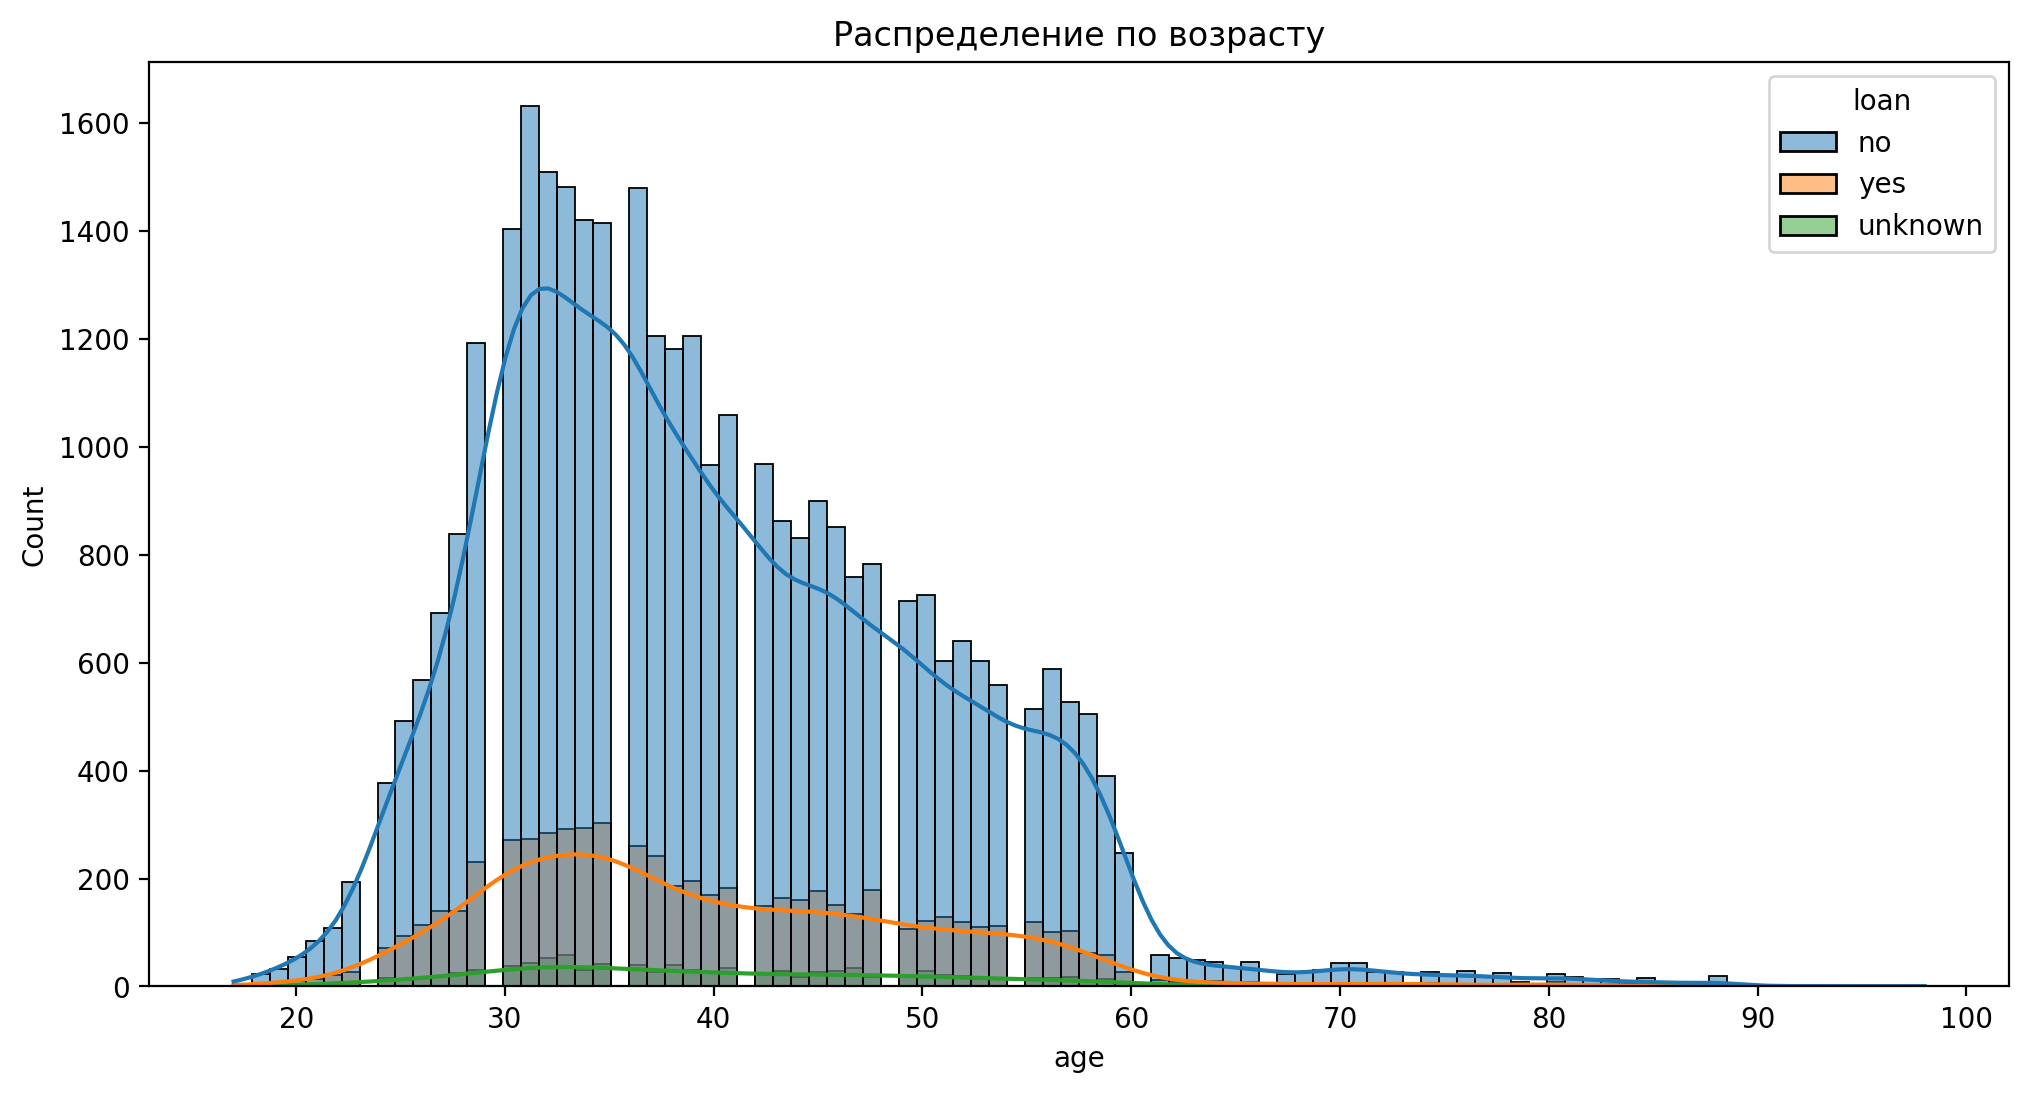

In [7]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,
             x='age',
            hue='loan',
            kde = True).set_title('Распределение по возрасту');

Видим, что большая часть маркетинговых коммуникаций отправлялась людям в возрасте от 32 до 40 лет, когда людям больше всего пригодятся кредиты, например, на покупку жилья.  
__loan__ - признак наличия кредита у человека в настоящий момент. Именно этот признак был выбран нами для первичного разделения людей на кластеры, чтобы далее интерпретировать людей нужным нам образом.  
По этому признаку мы видим, что у большинства людей нет кредита

__pdays__ - Количество дней с последней коммуникации с клиентом, где 999 - значит, что с клиентом никогда раньше не контактировали, поэтому стоит её исключить

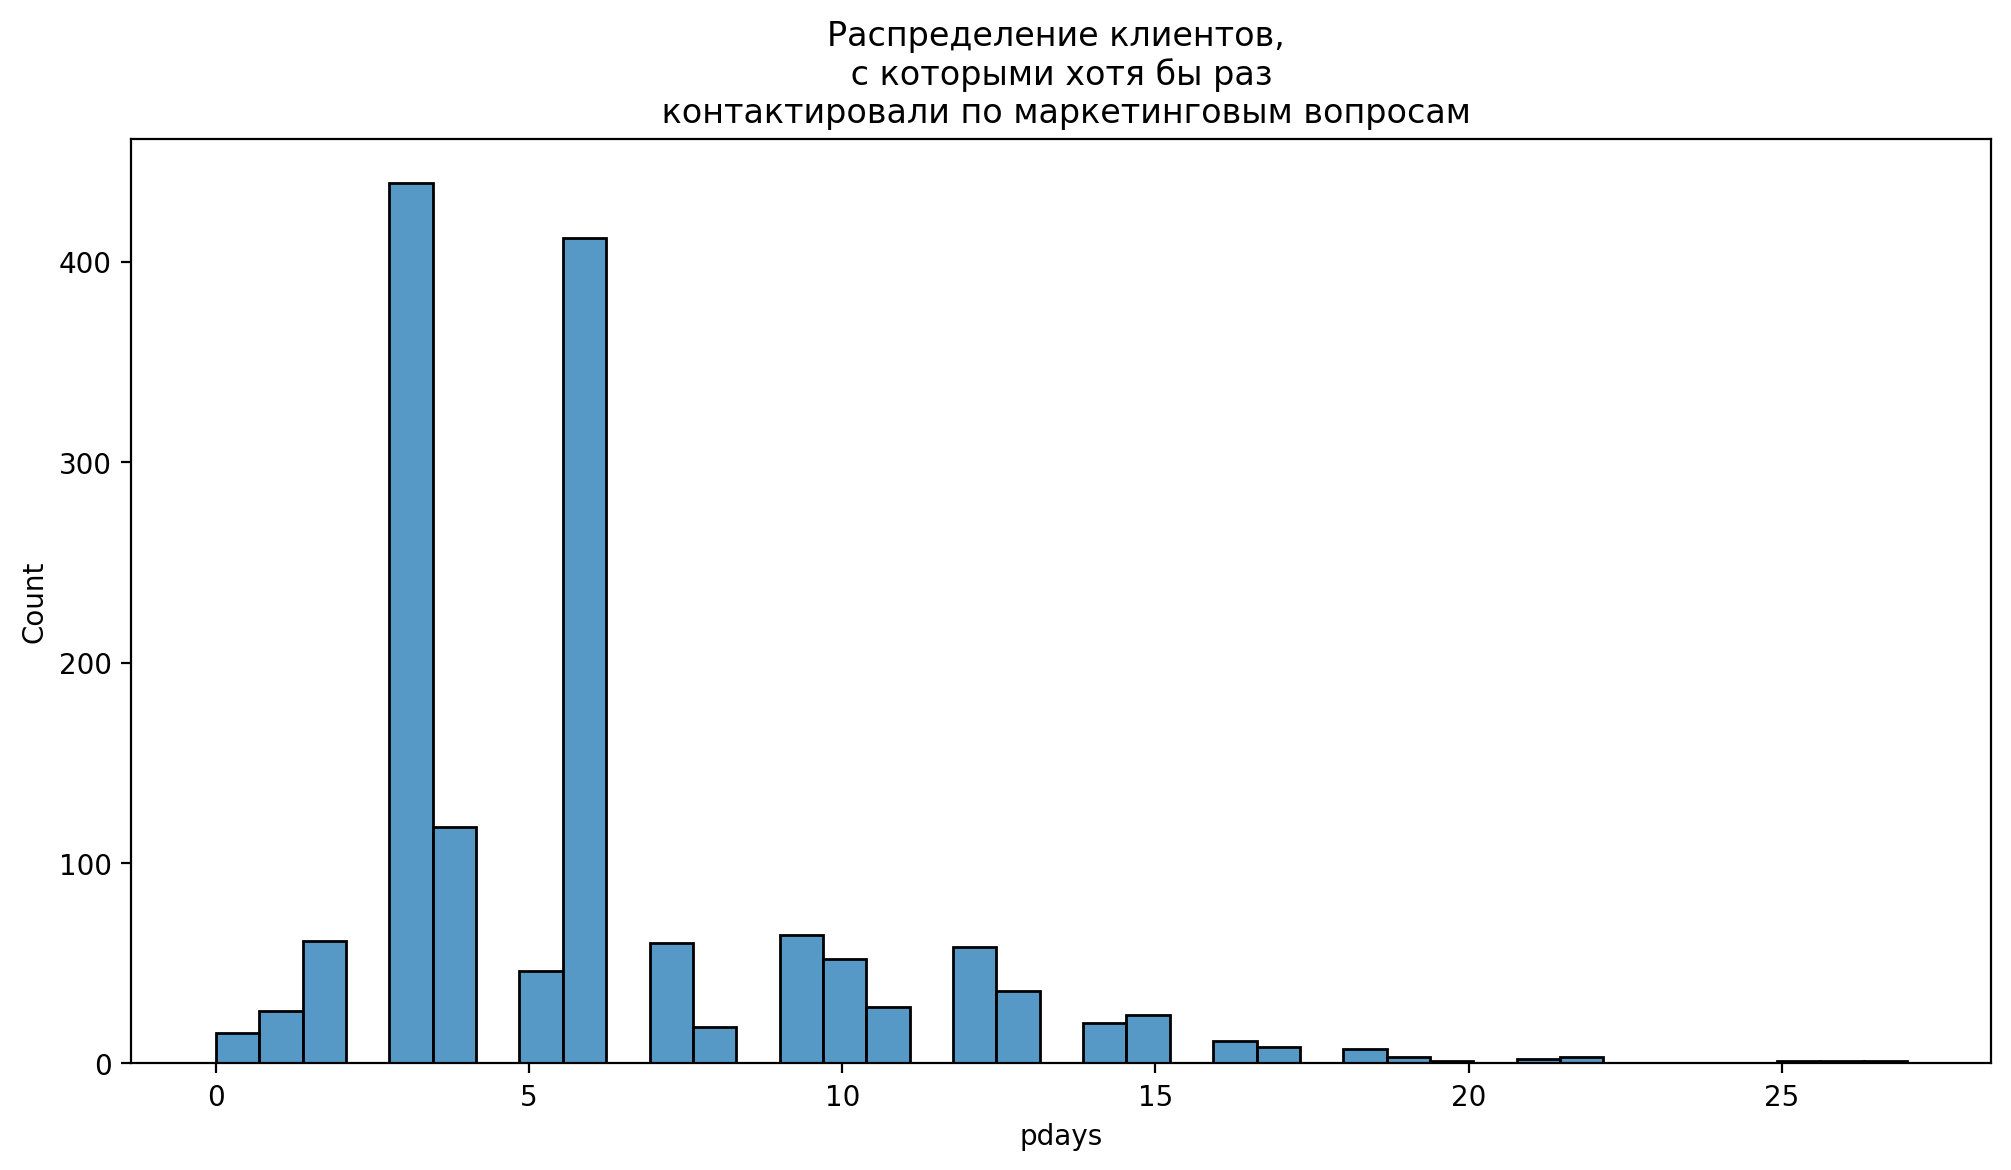

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=num_df[num_df['pdays']!=999],
             x='pdays').set_title('Распределение клиентов, \n с которыми хотя бы раз \n контактировали по маркетинговым вопросам');

In [9]:
num_df[num_df['pdays'] == 999].pdays.count()

39673

Видим, что количество людей, с которыми никогда не контактировали по маркетинговым вопросам (39673) преобладает над остальными, где максимум около 400

Рассмотрим далее признак длительности последнего общения __Contact duration__

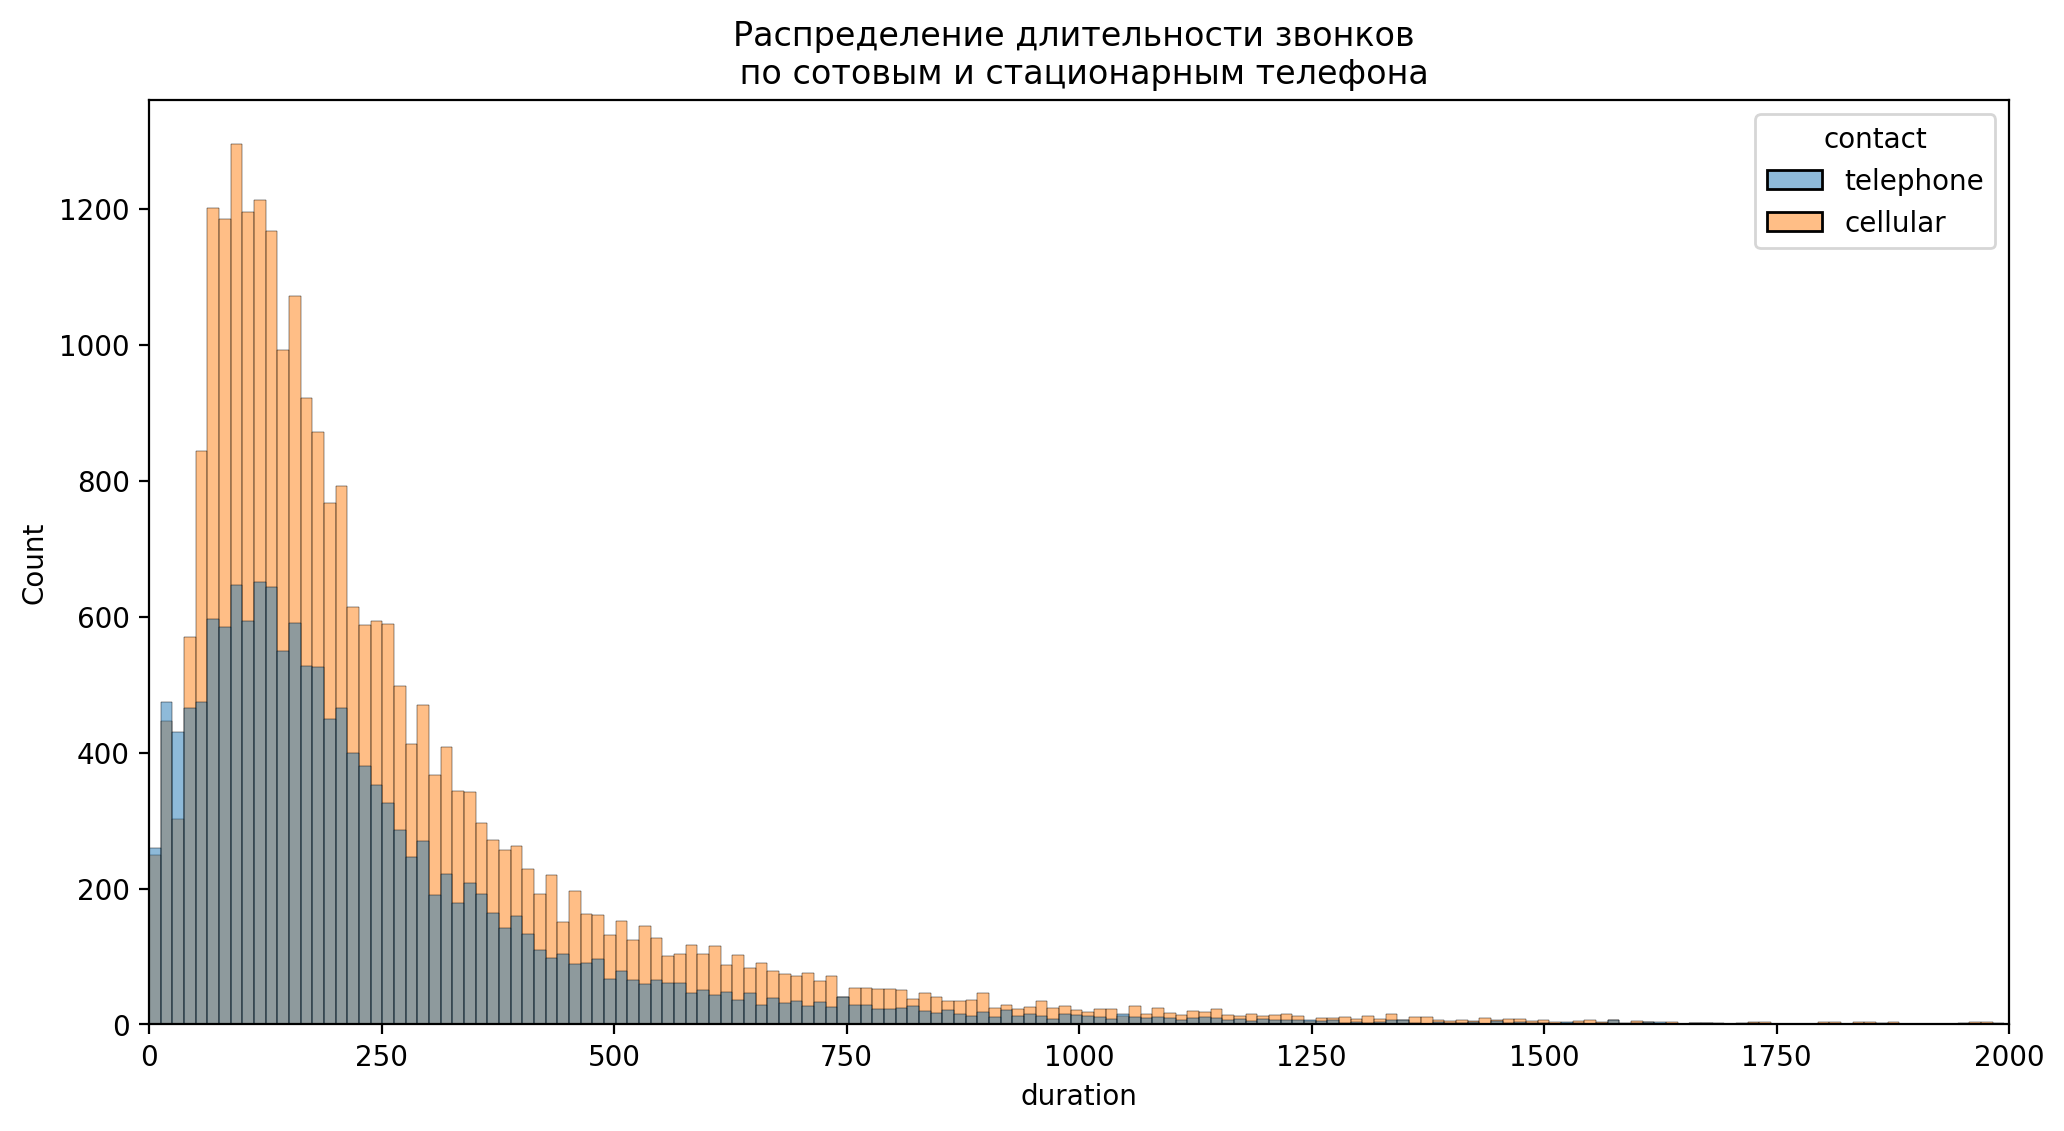

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,
             x='duration',
             hue='contact').set_title('Распределение длительности звонков \n по сотовым и стационарным телефона')
plt.xlim(0,2000);

Видим, несколько звонков, когда общение было аномально длительным, в то время как большинство звонков находится в диапазоне от 0 до 1000 сек. Для мобильных звонков профиль выше, но само распределение одинаково.


#### <font color='green'>2.2 Категориальные признаки</font>

In [11]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  subscribed   41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


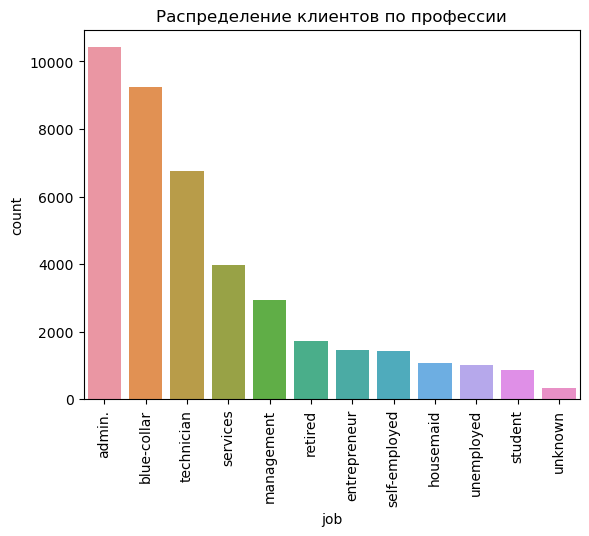

In [12]:
sns.countplot(data = cat_df,
             x = 'job',
             order=df['job'].value_counts().index).set_title('Распределение клиентов по профессии')
plt.xticks(rotation=90);

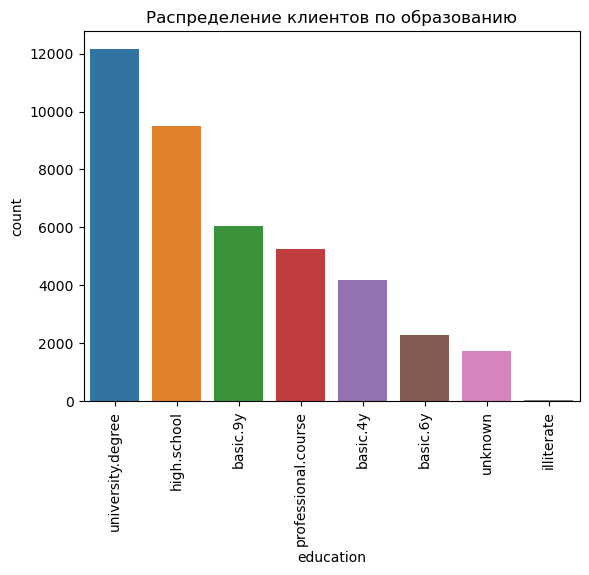

In [13]:
sns.countplot(data = cat_df,
             x = 'education',
             order=df['education'].value_counts().index).set_title('Распределение клиентов по образованию')
plt.xticks(rotation=90);

Большая часть клиентов имеет высшее образование и работает в качестве администраторов и голубых воротничков

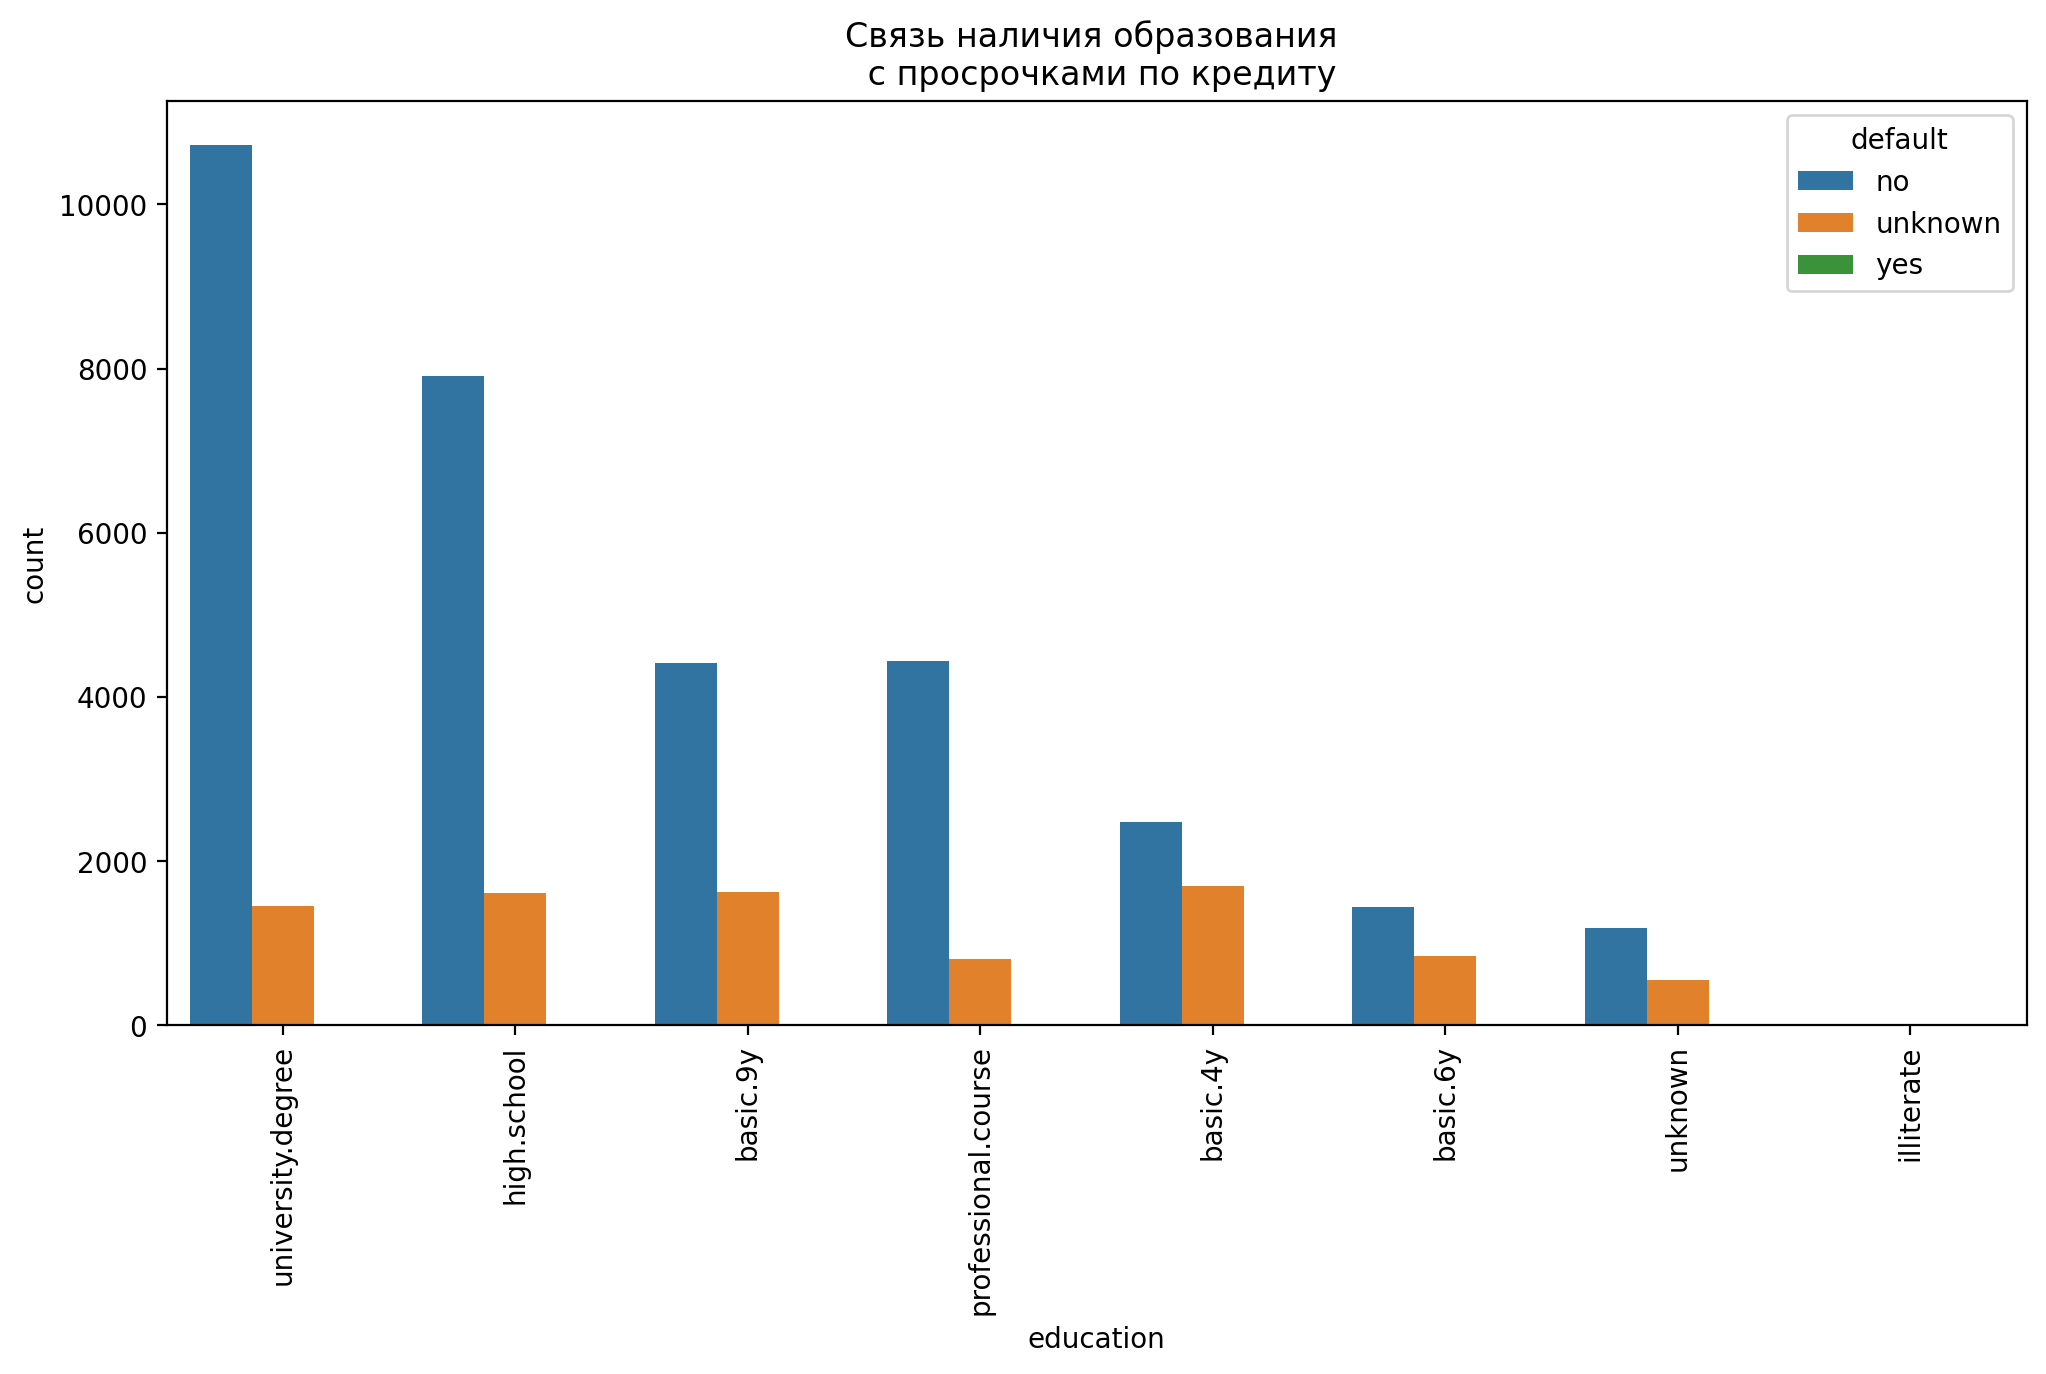

In [14]:
plt.figure(figsize=(12,6),dpi=200)

sns.countplot(data=df,
              x='education',
              order=df['education'].value_counts().index,
              hue='default').set_title('Связь наличия образования \n с просрочками по кредиту')
plt.xticks(rotation=90);

Видим, что чем лучше образование, тем меньше вероятность просрочки по кредиту

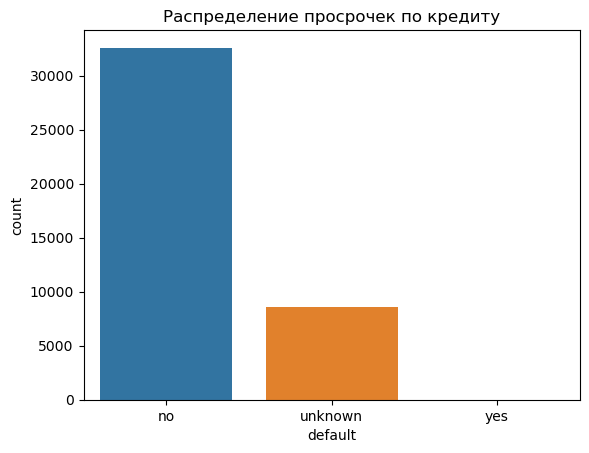

In [15]:
sns.countplot(data=cat_df,
              x='default').set_title('Распределение просрочек по кредиту');

## <font color='green'>3. Кластеризация</font>

In [16]:
X = pd.get_dummies(df)

В данном методе не происходит разделение на обучающие и тестовые наборы, так как у нас нет данных, с которыми можем сверяться

In [17]:
#Создаем экземпляр класса
scaler = StandardScaler()

#Масштабируем признаки
scaled_X = scaler.fit_transform(X)

Мы делаем fit и transform  в один шаг, так как у нас нет разделение на обучающие и тестовые наборы, где могла бы быть утечка данных

Подберем подходящее количество кластеров с помощью метода локтя, о есть найдем точку, где значение К уменьшается не так сильно, как в других точках

In [18]:
# Сумма квадратов расстояний от точек до ближайших центров кластеров
# (SSD - Sum of squared distances) 
ssd = []
#Silhouette score
s_s = []

#Подберем подходящее количество кластеров
for k in range(2,10):
    
    #Создаем модель
    model = KMeans(n_clusters=k)
    
    #Обучаем модель
    model.fit(scaled_X)
       
    #Добавляем полученные значения в списки
    ssd.append(model.inertia_)
    s_s.append(silhouette_score(scaled_X, model.labels_))
   

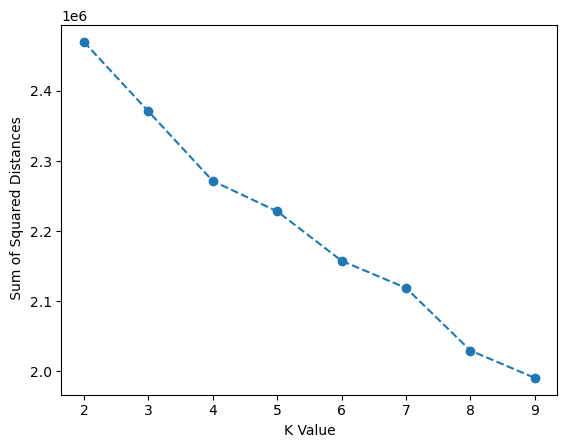

In [19]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

Видим, что после 8 кластеров значение суммы квадратов расстояний уменьшается не так сильно.
Построем еще раз модель и провизуализируем результат

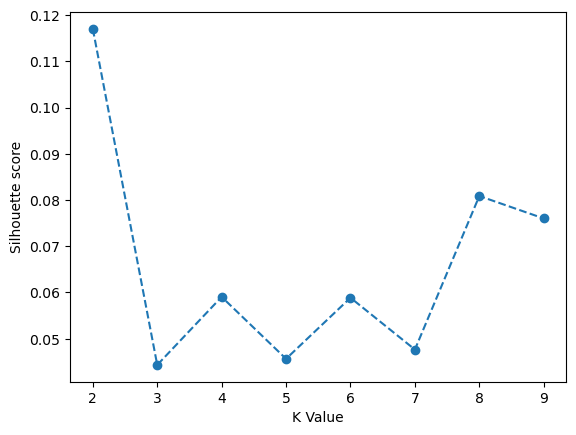

In [20]:
plt.plot(range(2,10),s_s,'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette score");

In [21]:
model = KMeans(n_clusters=8)

#fit_predict - вычисляет центр кластеров
# и возвращает значения кластеров для наших точек
cluster_labels = model.fit_predict(scaled_X)

In [22]:
#Как бы создаем целевую переменную
X['Cluster'] = cluster_labels

В качестве одной из интерпретаций можно посмотреть как отдельные признаки коррелируют с переменной __Cluster__

In [23]:
X.corr()['Cluster'].iloc[:-1].sort_values()

month_nov          -0.543447
pdays              -0.345607
subscribed_yes     -0.234145
poutcome_failure   -0.213265
default_unknown    -0.157495
                      ...   
euribor3m           0.255988
poutcome_success    0.329949
emp.var.rate        0.337019
cons.price.idx      0.374956
month_jul           0.440311
Name: Cluster, Length: 65, dtype: float64

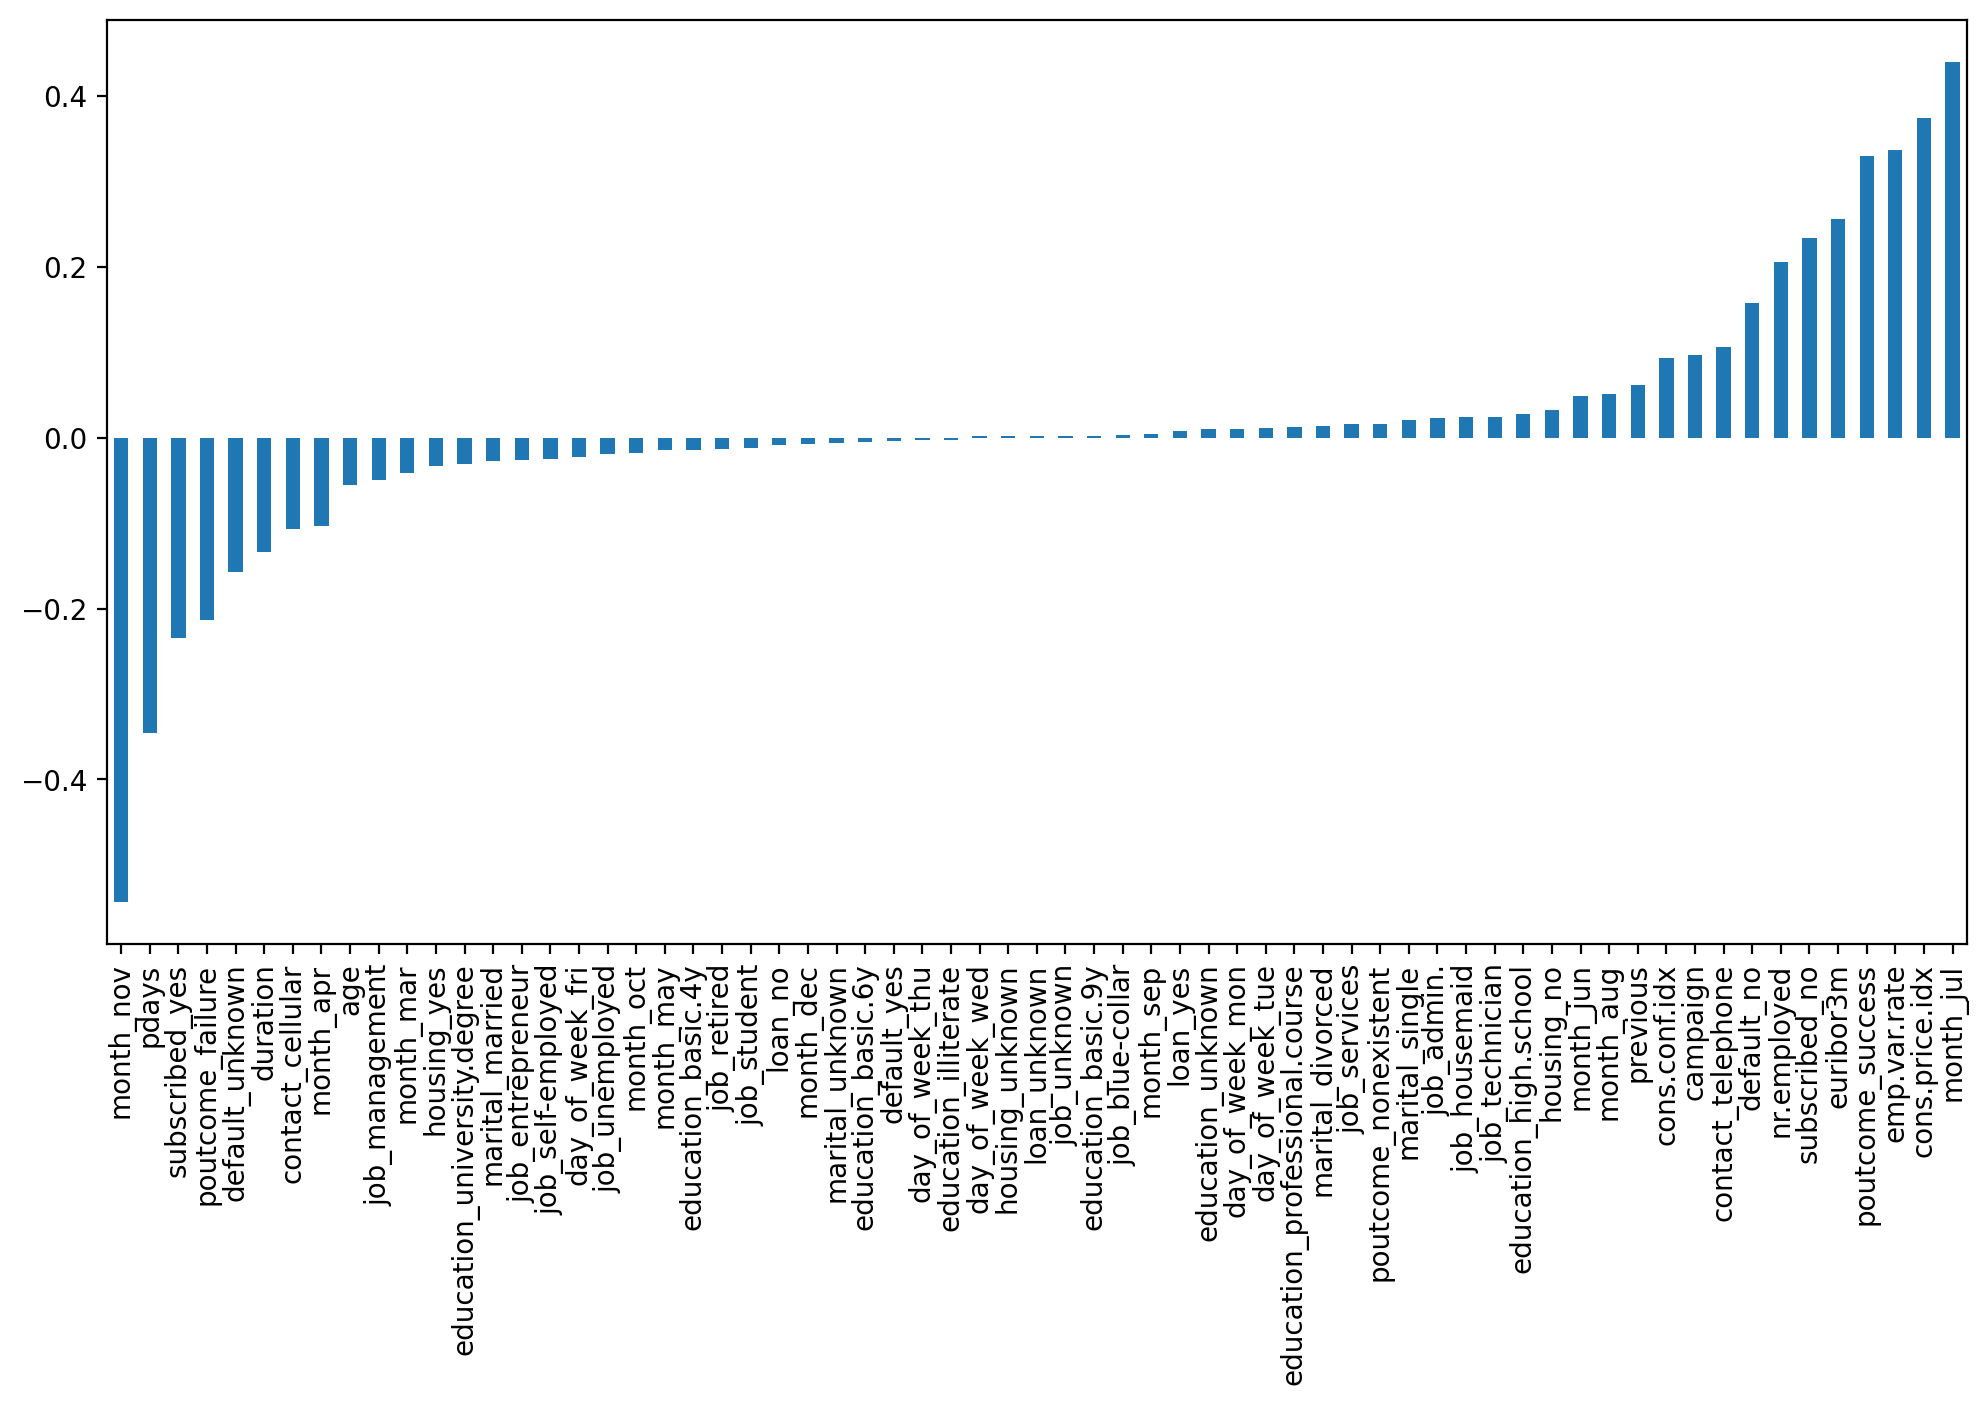

In [24]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');